# **ch.04 다양한 분류 알고리즘**  
## 04-2 확률적 경사 하강법  
### 풀어야 할 문제:  
> ### train data가 한 번에 준비되는 것이 아니라 조금씩 전달되는 상황에서 효과적으로 model을 train하라.  
### *점진적인 학습*  
주어진 상황에서 model을 train할 방법에는 여러가지가 있지만, 가장 효과적인 방법 중 하나는 이전에 train한 model을 새로운 data로 train하는 방법임  
이러한 train strategy를 incremental learning이라고 함


대표적인 incremental learning algorithm에는 stochastic gradient descent(SGD)가 있음

### *확률적 경사 하강법*  
stohastic(확률적): '무작위하게', '랜덤하게'의 기술적 표현  
gradient(경사): 기울기  
descent(하강법): 내려가는 방법  
&rarr; 산(loss function)에서 내려갈 때, 한 가지 sample을 무작위로 골라 가장 가파른 길을 찾는 것을 train set이 소진될 때까지 반복하는 방식으로 train하는 algorithm  
만약 train set을 모두 소진했음에도 산을 다 내려가지 못한다면, 처음부터 다시 반복  
이렇게 train set을 한 번 모두 사용하는 과정을 epoch라 함


minibatch gradient descent: 하나의 sample이 아닌 여러 개의 sample을 선택해 그 중 가장 가파른 길을 선택하는 방법  
batch gradient descent: 한 번의 이동에 train set 전체를 사용하는 방법  


### *손실 함수*  
loss function: 문제에서 machine-learning algorithm이 얼마나 엉터리인지 측정하는 기준  
&rarr; loss function value가 작을수록 좋음. 그러나 어떤 value가 minimum인지는 모름  
$\therefore$ 충분히 minimum을 찾아보고 만족할 만한 수준이라면 minimum이라고 판단


classification에서 loss는 아주 확실 &rarr; 정답을 맞추지 못하는 것  
그렇다면 classification에서 loss function으로 accuracy를 사용할 수 있지 않을까?  
&rarr; 안됨. accuracy는 연속적이어야 함. 즉 differentible(미분가능)해야 함  


### *로지스틱 손실 함수*  
binary cross-entropy loss function (logistic loss function): binary classification에서 positive class일 때 loss를 $-log_{10}{(예측 확률)}$로 계산하고, negative class일 때 $-log_{10}{(1-예측 확률)}$로 계산하는 loss function


cross-entropy loss function: multi-class classification에서 사용하는 binary cross-entropy loss function과 비슷하게 작동하는 loss function


regression에서 loss function  
+ mean absolute error(MAE): $|target - prediction|$을 모든 sample에 평균
+ mean squared error(MSE): $(target - prediction)^2$을 모든 sample에 평균


### *SGDClassifier*  
SGD를 사용한 classification model 만들기


data 준비  
csv file to dataframe

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

Species를 제외한 5개 column를 input data, Species는 target data

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train set, test set 나누기

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

scale normalization

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

import SGDClassifier,  
generate class object  
class object를 만들 때, loss parameter로 loss function을 지정하고 max_iter parameter로 epoch 수 지정

In [10]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

train model,  
score model

In [11]:
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


accuracy가 낮음 $\because$ 아마 iteration 부족


SGD는 incremental learning이 가능함. SGDClassifier object를 새로 만들지 않고 더 train시켜 보자. trained model을 더 train할 때는 partial_fit() method를 사용  
partial_fit() 1회 call마다 1 epoch씩 train

In [12]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


accuracy 향상 &rarr; 여러 epoch에 걸쳐 train할 필요가 있음  
그러나 무작정 iteration 할 수는 없으니 '얼마나 더 해야 할까'에 대한 기준이 필요


### *에포크와 과대 / 과소적합*  
SGD를 사용한 model은 epoch 횟수에 따라 overfitting이나 underfitting이 발생할 수 있음  
+ epoch &darr;: model이 train set을 충분히 learning하지 못함 &rarr; underfitting
+ epoch &uarr;: model이 train set을 과하게 learning &rarr; overfitting


epoch가 진행됨에 따라 train set에 대한 score는 꾸준히 증가, 그러나 test set에 대한 score는 어느 순간부터 감소하기 시작 &rarr; model이 overfitting되기 전에 train을 멈추는 것이 필요, 이를 early stopping(조기 종료)이라 함


epoch의 진행에 따른 model의 accuracy graph 그리기  
fit() method를 사용하지 않고, partial_fit() method만 사용  
이를 위해서는 train set의 label of entire class를 partial_fit()에 전달에 주어야 함  
&rarr; np.unique() function으로 train_target에 있는 7가지 생선의 목록 만들기  
epoch마다 train set과 test set에 대한 score를 저장하기 위한 list 만들기

In [13]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

300 epoch 동안 iterate training, 각 epoch마다 train set과 test set에 대한 score를 list에 append

In [15]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/pri

/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/pri

/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/pri

graph 그리기

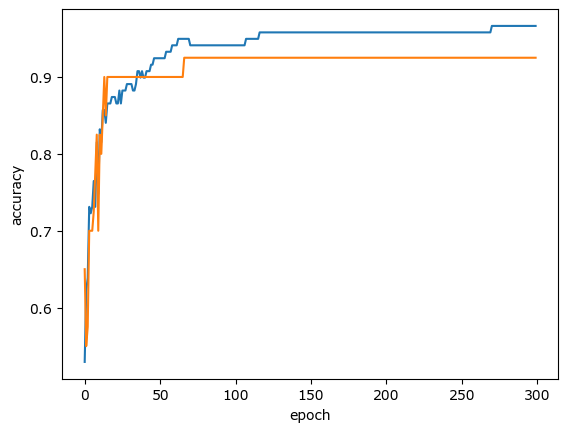

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

명확하게 드러나지는 않지만, 대략 100번 째 epoch 이후부터 train set과 test set에 대한 score가 벌어지고 있음  
epoch 초기에는 underfitting되어 score가 낮음  
이 model의 경우, epoch=100이 적절해 보임


iteration을 100으로 설정하여 다시 train하고 score 확인  
(SGDClassifier는 일정 epoch 동안 performance가 향상되지 않으면 자동으로 멈춤. tol parameter는 이 performance 향상의 최솟값을 지정)

In [18]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
